# LIF comparison

TODO:
- visualize spike timing difference (absolute difference and ISI)
- put some symbolic marker in the max_error plot to show a simple time delay

## install libraries

In [1]:
# ! pip install SciencePlots

## setup

In [61]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

filenames = {
    'Norse': 'lif_norse.csv',
    'Nengo': 'lif_nengo.csv',
    'snnTorch': 'lif_snntorch.csv',
    'Lava (CPU)': 'lif_lava_cpu_float.csv',
    'Lava (Loihi)': 'lif_lava_loihi_fixed.csv',
    'SpiNNaker2': 'lif_spinnaker2.csv',
}
data = {
    name: np.loadtxt(filename, delimiter=',')
    for name, filename in filenames.items()
}
voltages = {
    name: data[name][:, 1] / data[name][:, 1].max() for name in data.keys()
}
spikes = {
    name: np.where(data[name][:, 2] == 1)[0] for name in data.keys()
}
input_data = data['Norse'][:, 0]

In [3]:
# plt.style.use("seaborn-v0_8-deep")
# plt.style.use("seaborn-v0_8-paper")
# plt.style.use("seaborn-v0_8-muted")
plt.style.use(["science", "bright"])

## 2D comparison plot

/var/folders/kd/773vphv51bdclptjzptm_4km0000gn/T/ipykernel_87297/3697920897.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['', ''])


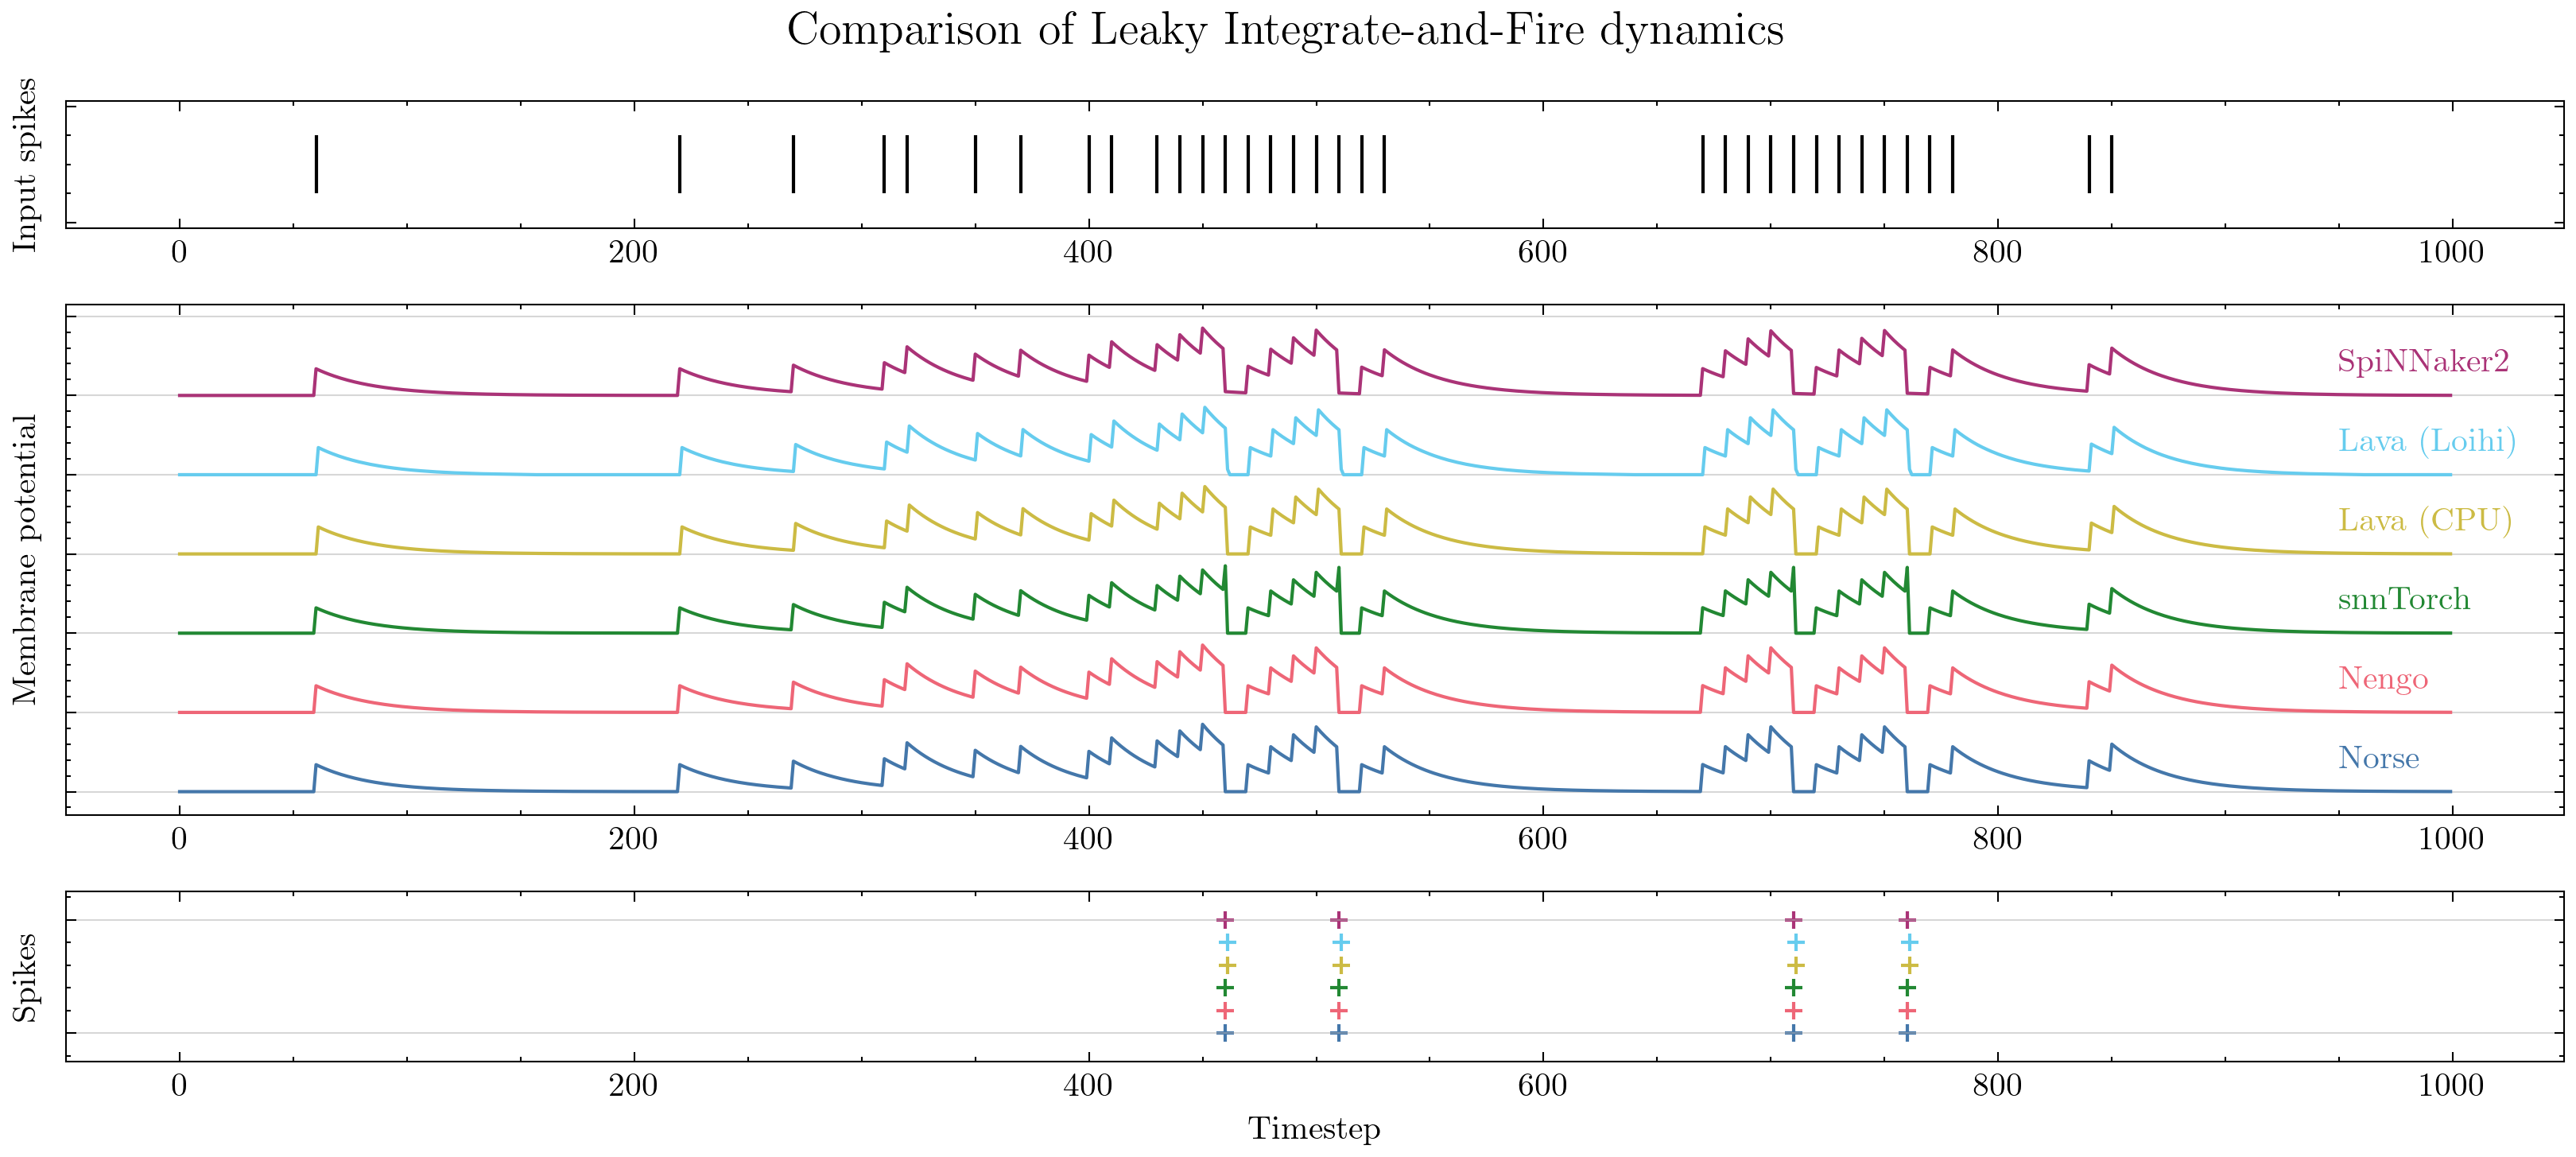

In [72]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig = plt.figure(figsize=(11, 5), dpi=300)
fig.suptitle('Comparison of Leaky Integrate-and-Fire dynamics', fontsize=14)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1.5, 6, 2])

ax0 = fig.add_subplot(spec[0])
ax0.set_ylabel('Input spikes')
ax0.set_yticklabels([])
ax0.eventplot(np.where(input_data == 1.)[0], colors='k')
# ax0.set_xticklabels([])

ax1 = fig.add_subplot(spec[1], sharex=ax0)
for idx, (name, voltage) in enumerate(voltages.items()):
    ax1.plot(voltage * 0.85 + idx, label=name)
    ax1.text(950, idx + 0.3, name, color=colors[idx])
ax1.set_ylabel('Membrane potential')
ax1.set_yticklabels([])
# ax1.set_xticklabels([])
ax1.grid(axis='y', alpha=0.5)

ax3 = fig.add_subplot(spec[2], sharex=ax1)
ax3.set_ylabel('Spikes')
for idx, (name, spike) in enumerate(spikes.items()):
    yval = 1 + idx / (len(spikes)-1)
    ax3.scatter(spike, np.ones_like(spike) * yval, s=30, label=name, marker='+')
ax3.set_ylim(0.75, 2.25)
ax3.set_yticklabels([])
ax3.set_yticklabels(['', ''])
ax3.grid(axis='y', alpha=0.5)
ax3.set_xlabel('Timestep')

plt.tight_layout()
plt.savefig('lif_comparison.pdf', dpi=300)
plt.show()

## 3D version (experimental, not updated)

Still experimental, will need to stitch the graphics together manually because matplotlib doesn't want to scale 3D graphics properly..

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

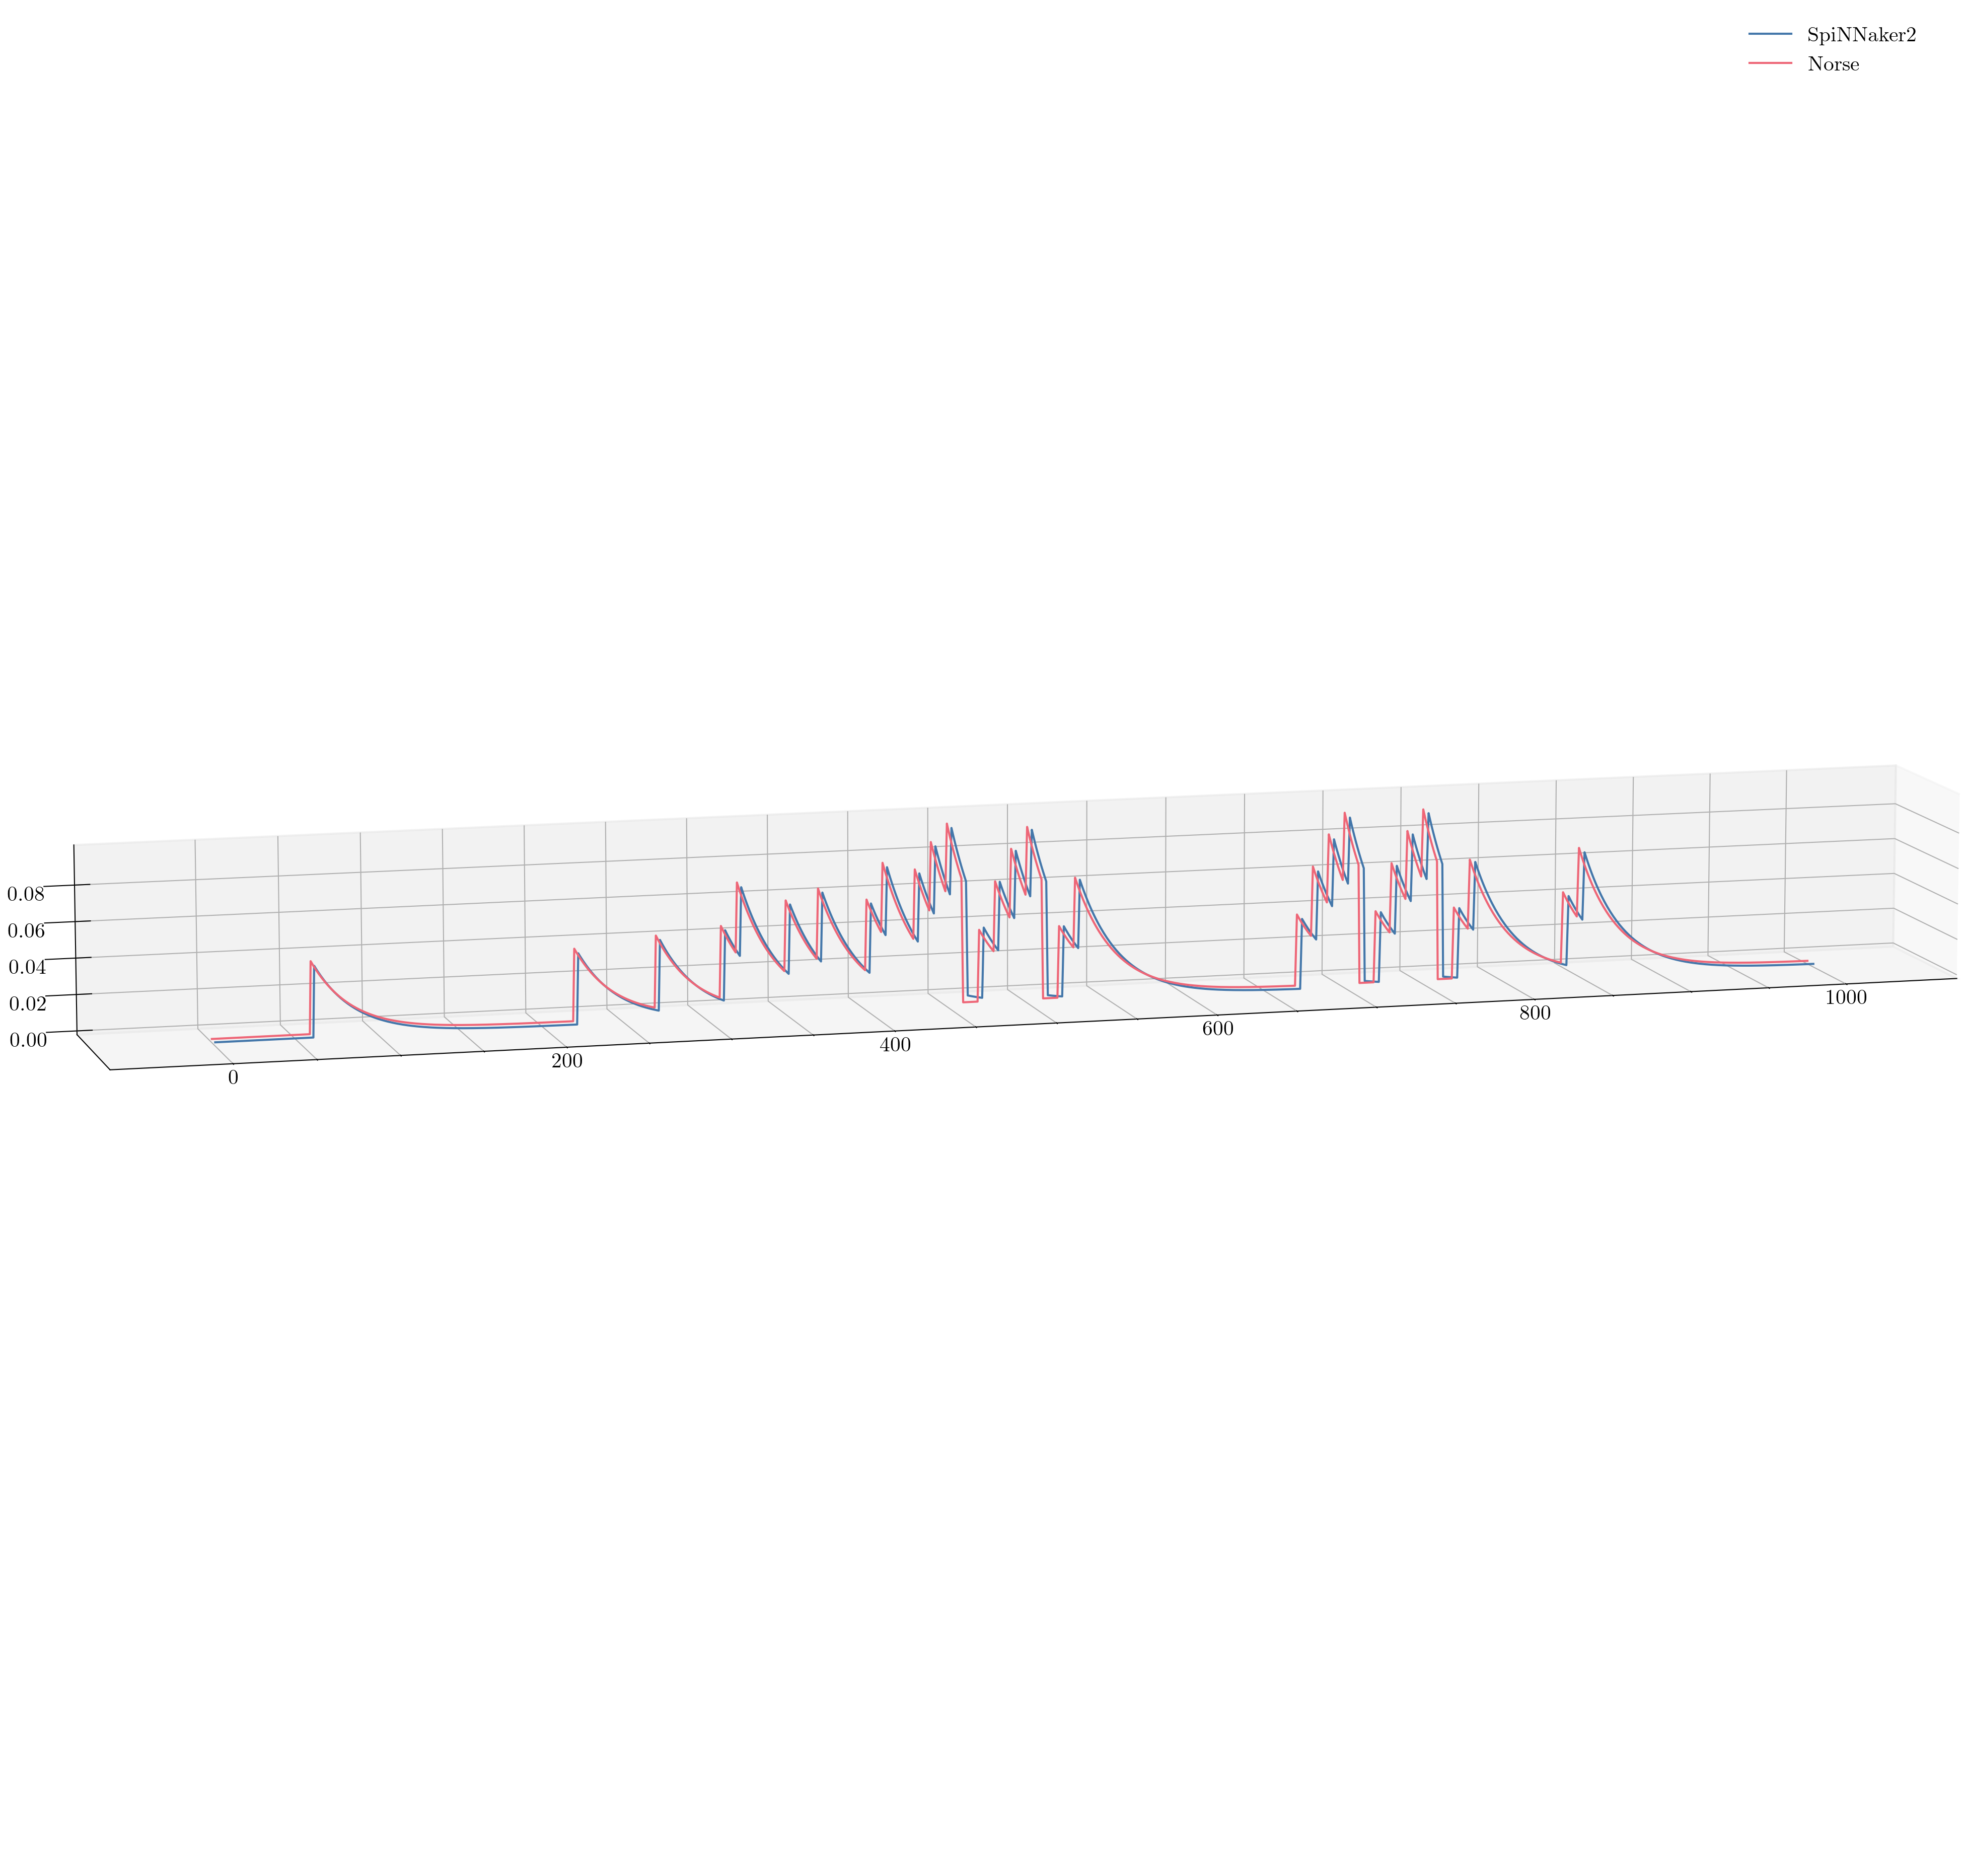

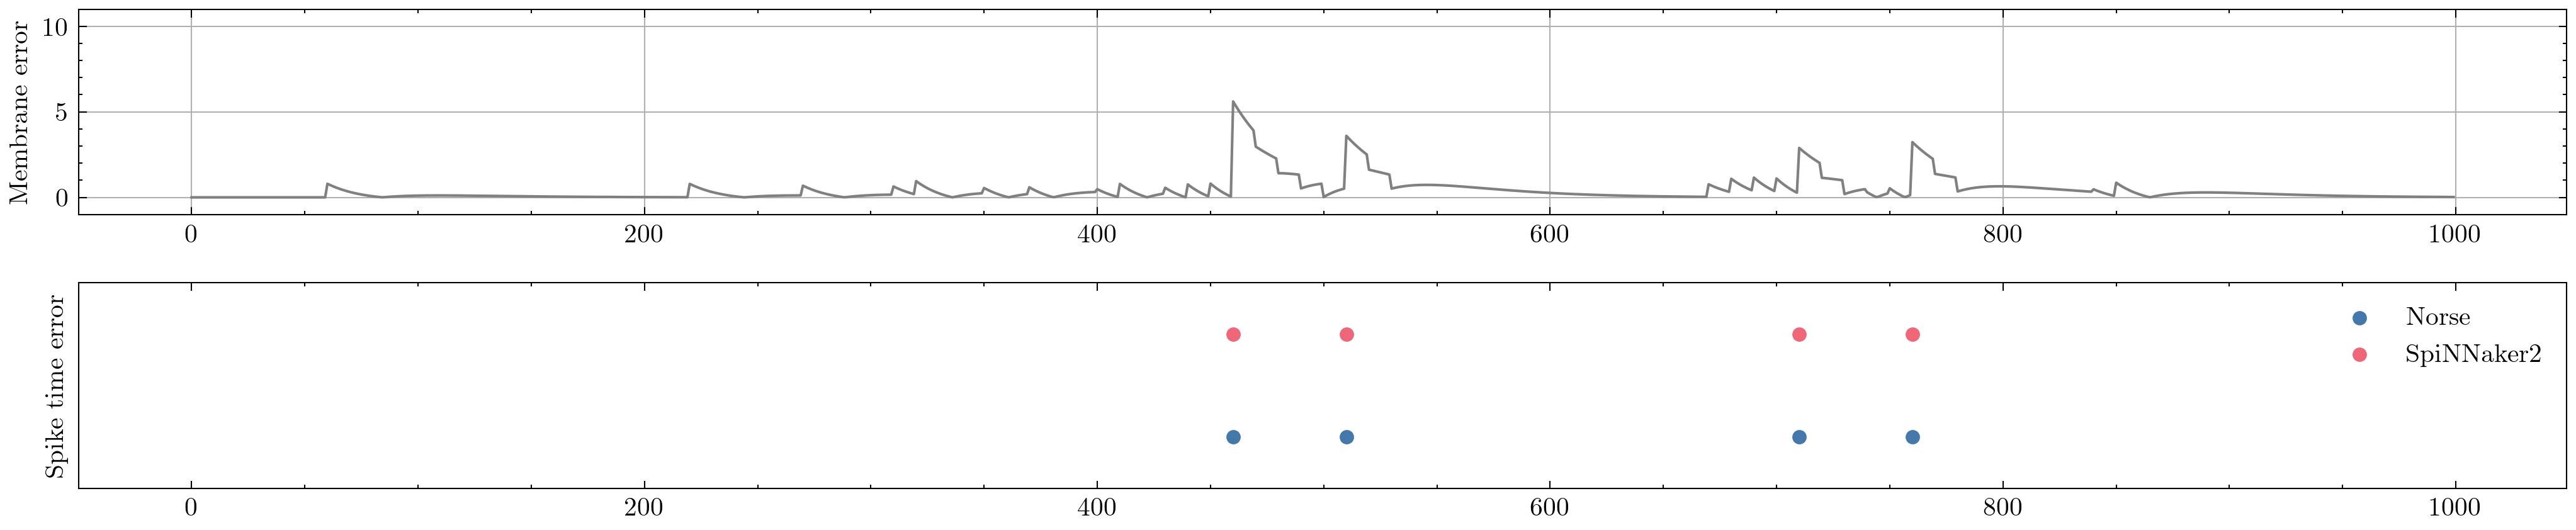

In [6]:
figsize = (17, 8)
fig = plt.figure(figsize=tuple(map(lambda x: 2*x, figsize)), dpi=300)
# fig = plt.figure(figsize=(17, 8), dpi=300)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=1)
ax1 = fig.add_subplot(spec[0], projection='3d')
ax1.plot(np.arange(v_spin.shape[0]), np.ones_like(v_spin) * 0, v_spin, label='SpiNNaker2', lw=1)
ax1.plot(np.arange(v_norse.shape[0]), np.ones_like(v_norse) * 1., v_norse, label='Norse', lw=1)
ax1.set_box_aspect((10, 1, 1))
YLIM = 5
ax1.set_ylim(-YLIM, YLIM)
ax1.set_yticks([])
ax1.legend()
ax1.view_init(elev=10, azim=255, roll=0)

plt.show()
plt.close()

fig = plt.figure(figsize=(17, 8), dpi=300)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 1, 1])

ax2 = fig.add_subplot(spec[1], sharex=ax1)
ax2.plot(abs(v_norse - v_spin) / v_norse.max(), c='gray')
ax2.set_ylabel('Membrane error')
ax2.set_ylim(0-1e-2, 0.1+1e-2)
ax2.set_yticks([0, 0.05, 0.1])
ax2.set_yticklabels(['0%', '5%', '10%'])
ax2.grid()

# TODO: visualize spike timing difference 
# (e.g. area of mismatch on the bottom of the plot)
ax3 = fig.add_subplot(spec[2], sharex=ax1)
ax3.set_ylabel('Spike time error')
ax3.scatter(st_norse, np.ones_like(st_norse), s=20, label='Norse')
ax3.scatter(st_spin, np.ones_like(st_spin) * 2., s=20, label='SpiNNaker2')
ax3.set_ylim(0.5, 2.5)
ax3.set_yticks([])
ax3.legend()

plt.show()